# PROYECTO FINAL "Depresión en Estudiantes De La India"

## Instituto Politécnico Nacional
### Unidad Profesional Interdisciplinaria en Ingeniería y Tecnologías Avanzadas UPIITA

- Guerra López Oscar
- Pérez Medellín Bruno
- Rodríguez Frausto Ricardo Josué




## Librerías

In [ ]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import re
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
#Cargamos el Dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datostristes = pd.read_csv("/content/drive/MyDrive/Samsunfinal/UDEMPF/SDD.csv")
noriginal = datostristes.shape[0]
print(f"El conjunto de datos original contiene: {noriginal} regitros")
#print(datostristes["Study Satisfaction"].value_counts())

El conjunto de datos original contiene: 27901 regitros


## Graficas para el análisis

### Histogramas con distribuciones de densidad

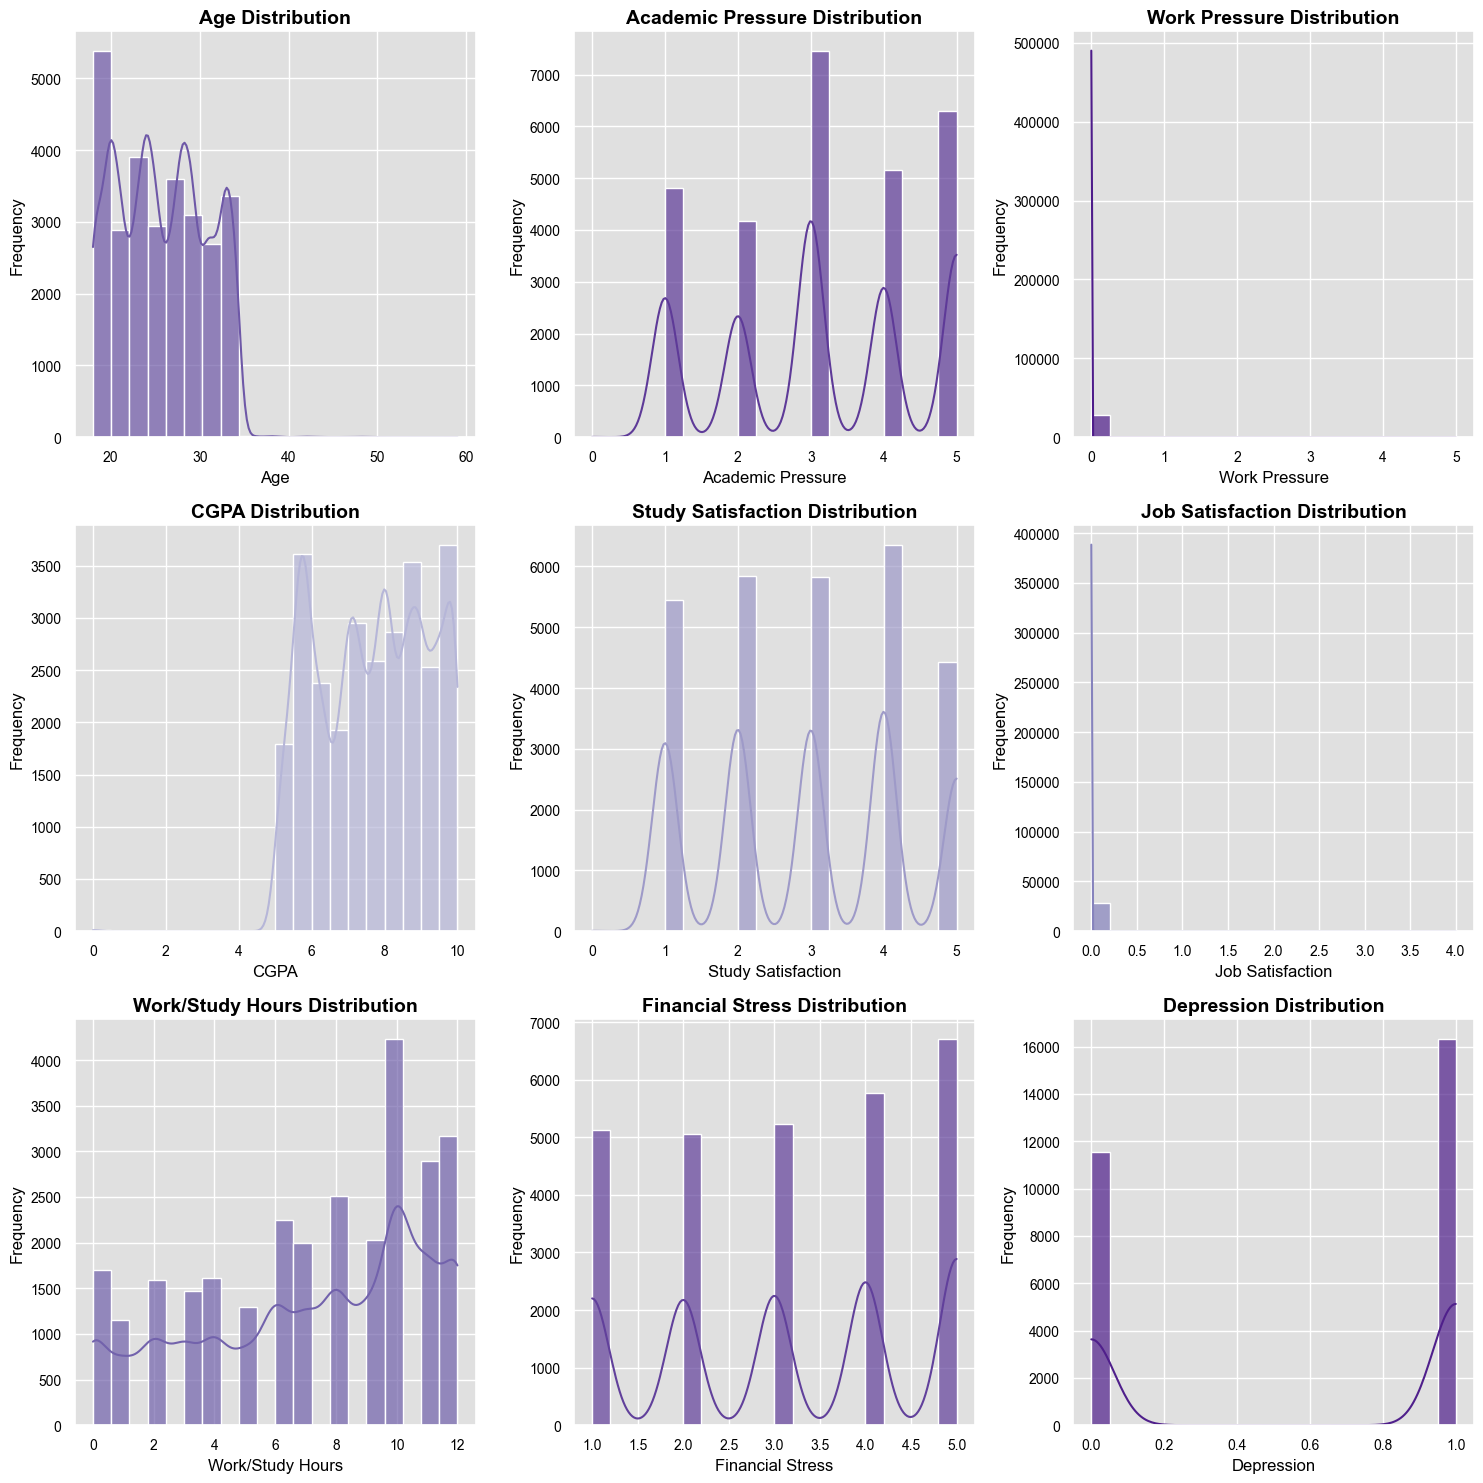

In [ ]:
# Analizarémos las columnas numéricas
warnings.filterwarnings("ignore")
numerical_columns = datostristes.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col.lower() != 'id']
# Configuramos las gráficas de las gráficas
sns.set(style="darkgrid")
num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()
colors = sns.color_palette("Purples", num_cols)
dark_colors = sns.color_palette("Purples", 10)[7:10]
colors[:3] = dark_colors
# Graficamos las columnas numericas
for i, col in enumerate(numerical_columns):
    sns.histplot(datostristes[col], kde=True, bins=20, color=colors[i], ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{col} Distribution', fontsize=14, fontweight='bold', color='black')
    axes[i].set_xlabel(col, fontsize=12, color='black')
    axes[i].set_ylabel('Frequency', fontsize=12, color='black')
    axes[i].tick_params(axis='both', which='major', labelsize=10, colors='black')
    axes[i].set_facecolor('#e0e0e0')  # Light gray background for each subplot
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

- Se observa que la mayoría de las personas en el conjunto de datos están en un rango de **edad** específico (probablemente entre 18 y 30 años).
- Hay picos en ciertos valores, lo que indica que muchas personas reportan niveles específicos de **presión académica**.
- Lo que indica que muchas personas experimentan poca o ninguna **presión laboral** es que la mayoría de los datos están concentrados cerca de 0.
- La distribución parece estar sesgada hacia la derecha, indicando que muchos estudiantes tienen un **CGPA** más alto.
- La **satisfacción de estudio** se encuentra en el rango de 1 a 5.
- Indicando que la mayoría de las personas en el conjunto de datos pueden no estar trabajando o tienen baja **satisfacción laboral**.
- Parece haber una distribución uniforme de las **horas trabajadas o estudiadas**.
- Se observa que muchos individuos experimentan niveles altos de **estrés financiero**.
- La **depresión** solo se distribuye en tre si estan deprimidos o no, sin algun punto medio

Outliers detected in columns:
Age
Academic Pressure
Work Pressure
CGPA
Study Satisfaction
Job Satisfaction
Work/Study Hours
Financial Stress
Depression


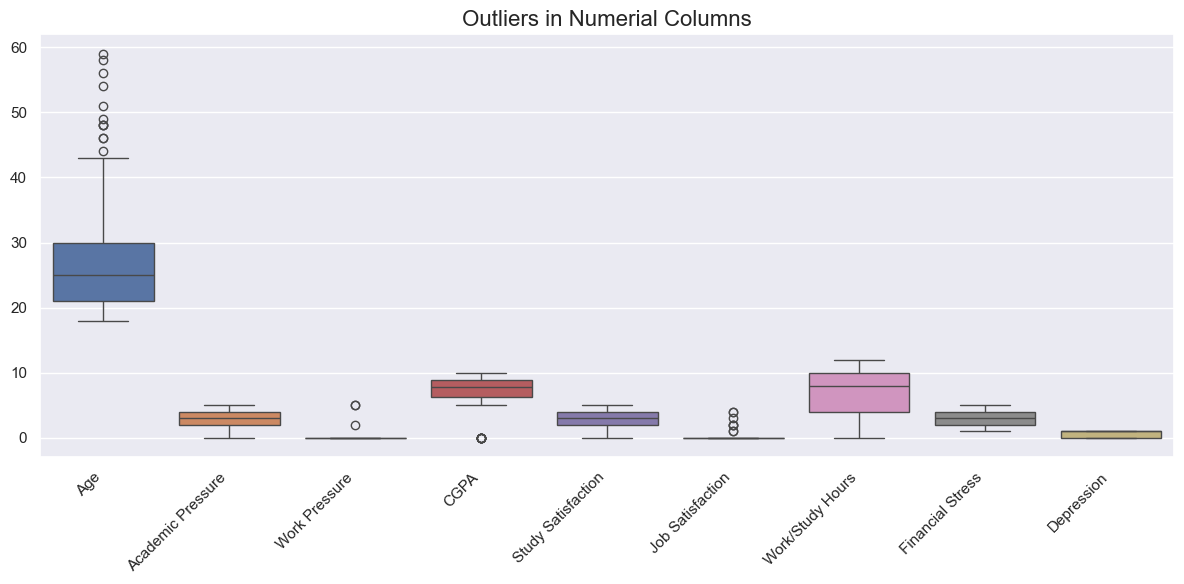

In [ ]:
# Step 1: Identify numerical columns (excluding 'id')
numerical_columns = datostristes.select_dtypes(include=['number']).columns
numerical_columns = [col for col in numerical_columns if col.lower() != 'id']  # Exclude 'id'

# Step 2: Outlier Detection using IQR method
def detect_outliers_iqr(df, numerical_columns):
    outliers = {}
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Get outliers based on IQR method
numerical_outliers = detect_outliers_iqr(datostristes, numerical_columns)

# Print outliers for numerical columns
print(f"Outliers detected in columns:")
for col, outlier_data in numerical_outliers.items():
    print(col)


# Step 3: Create a Boxplot for all numerical columns (excluding 'id')
plt.figure(figsize=(12, 6))
sns.boxplot(data=datostristes[numerical_columns])  # Only numerical columns excluding 'id'
plt.title('Outliers in Numerial Columns', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Distribución de la variables categoricas

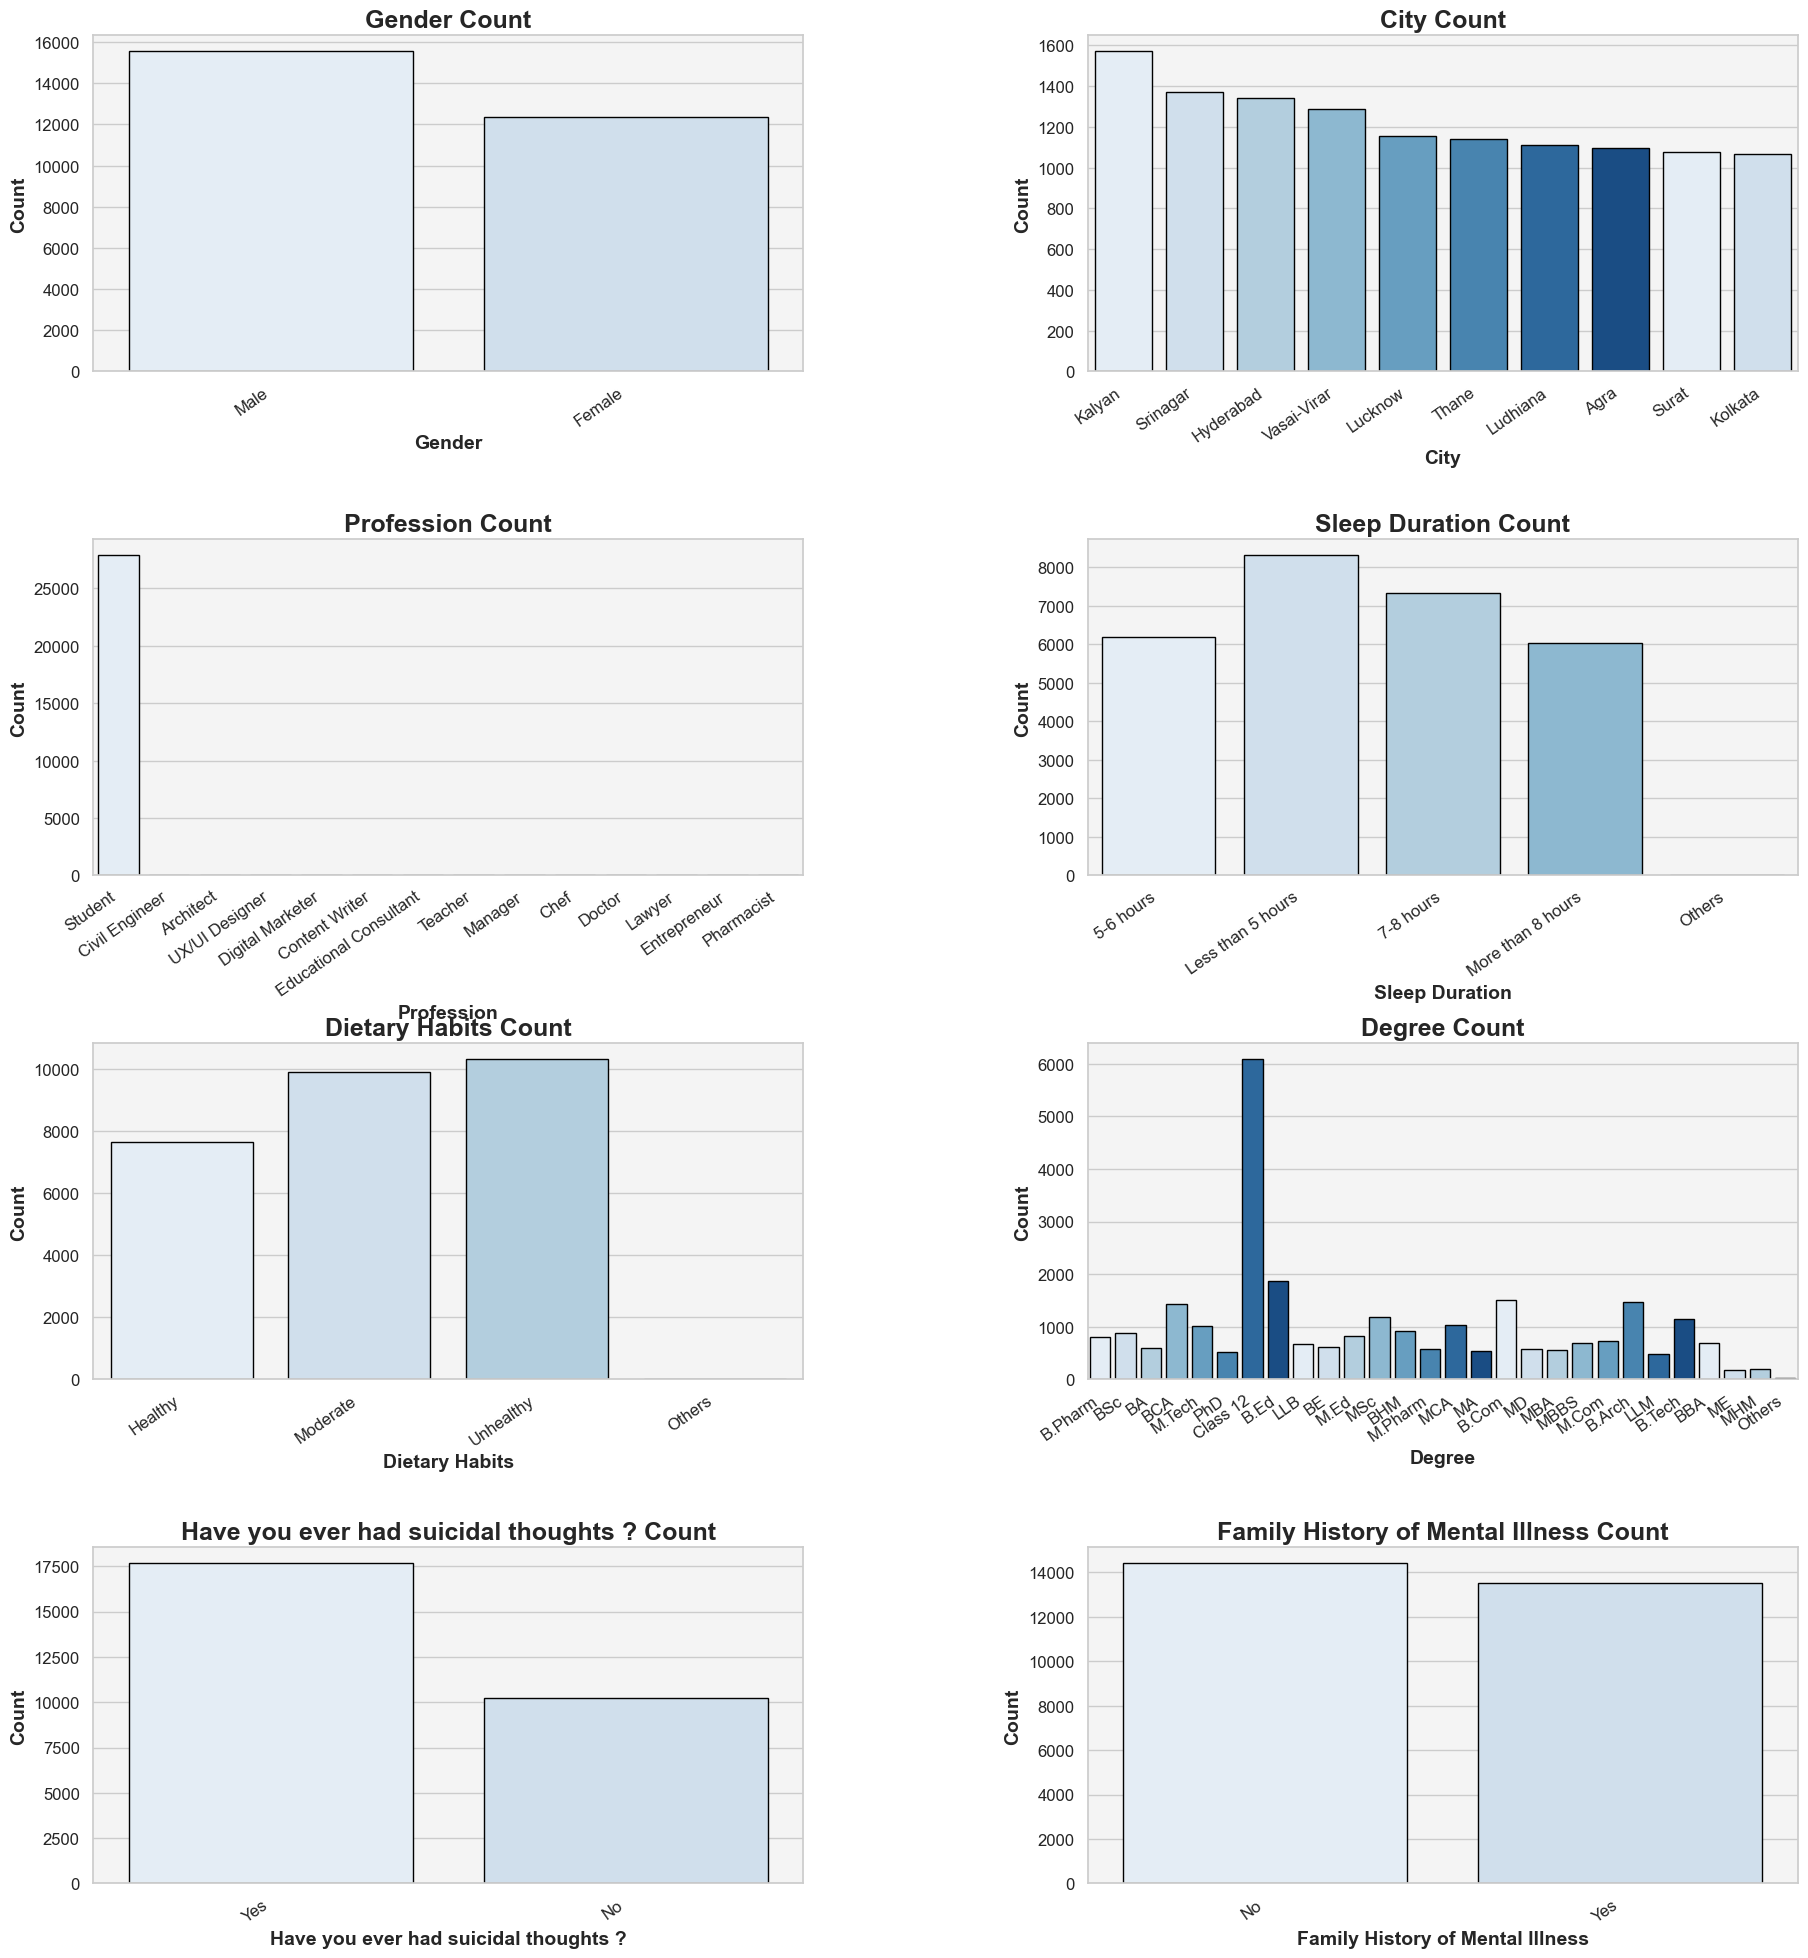

In [ ]:
warnings.filterwarnings("ignore")
categorical_columns = datostristes.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col.lower() != 'id']
#Configuramos las gráficas de las gráficas
sns.set(style="whitegrid")
num_cols = 2
num_rows = (len(categorical_columns) // num_cols) + (len(categorical_columns) % num_cols > 0)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(22, 6 * num_rows))
axes = axes.flatten()
colors = sns.color_palette("Blues", n_colors=8)

# Graficamos las columnas categoricas
for i, col in enumerate(categorical_columns):
    if col.lower() == 'city':
        sns.countplot(data=datostristes, x=col, ax=axes[i], palette=colors, order=datostristes[col].value_counts().iloc[:10].index)  # Top 10 cities only
        axes[i].set_title(f'{col} Count', fontsize=18, fontweight='bold')
    else:
        sns.countplot(data=datostristes, x=col, ax=axes[i], palette=colors)
        axes[i].set_title(f'{col} Count', fontsize=18, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Count', fontsize=14, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=35, labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

    for label in axes[i].get_xticklabels():
        label.set_horizontalalignment('right')
    for bar in axes[i].patches:
        bar.set_edgecolor('black')

    axes[i].set_facecolor('#f4f4f4')

for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

## LIMPIEZA DE DATOS

In [ ]:
# A partir del análisis realizado con ayuda de las gráficas de caja y bigotes
# Se decide eliminar los datos atípicos.

# Se obtienen en una lista las columnas del conjunto de datos
caractristes = list(datostristes.columns)

In [ ]:
# REFERENCIA
# ['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA'
#   0       1       2       3       4               5                       6           7
# , 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree'
#       8                       9                   10                  11              12
# , 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']
#           13                                      14                  15                  16                             17
# Los primeros datos a descartar son las ciudades que cuenten con menos de 400 entradas

nciudades = datostristes[caractristes[3]].value_counts()
nombreciudades=nciudades[datostristes[caractristes[3]].value_counts()<400].index

# Se realiza una operación de búsqueda de tipo or para identificar los índices
atipicos = datostristes[(datostristes[caractristes[3]].isin(nombreciudades))|(datostristes[caractristes[4]]!="Student")|(datostristes[caractristes[5]] == 0.0) | (datostristes[caractristes[7]] == 0)|(datostristes[caractristes[8]] == 0)|(datostristes[caractristes[10]] == "Others")|(datostristes[caractristes[11]] == "Others")|(datostristes[caractristes[12]] == "Others")|(datostristes[caractristes[15]].isnull())]

# Si bien es una operación de búsqueda un tanto compleja se va s describir cada componente de la operación lógica
# 1. Si el nombre de la ciudad se encuentre en lista de ciudades con cantidad menor de entradas a 400
# 2. Si la ocupación no sea estudiante
# 3. Si la presión académica sea 0
# 4. Si su promedio es 0
# 5. Si la cantidad de horas de descanso es otros
# 6. Si sus habitos alimenticios son otros
# 7. Si su situación financiera es nula

iatipicos = atipicos.index

datostristes.drop(iatipicos, inplace = True)
nfinal = datostristes.shape[0]
print(f"El conjunto de datos despues de eliminar valores atipicos, contiene {datostristes.shape[0]} regitros\nSe eliminaron {noriginal - nfinal} regitros = {round((noriginal - nfinal)/noriginal*100,3)}% ")
print(datostristes.isnull().sum())
print(datostristes["Work/Study Hours"].value_counts())

El conjunto de datos despues de eliminar valores atipicos, contiene 27762 regitros
Se eliminaron 139 regitros = 0.498% 
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64
Work/Study Hours
10.0    4217
12.0    3154
11.0    2883
8.0     2501
6.0     2240
9.0     202

In [ ]:
# Se guarda el conjunto de datos en un nuevo archivo de tipo CSV
# datostristes.to_csv("SDDlimpio.csv",index=False)
# datoslimpios = pd.read_csv("SDDlimpio.csv")
datoslimpios = datostristes.copy()
datoslimpios.drop(["id"],axis=1,inplace=True)
datoslimpios=datoslimpios.reset_index()
datoslimpios.head()

,index,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


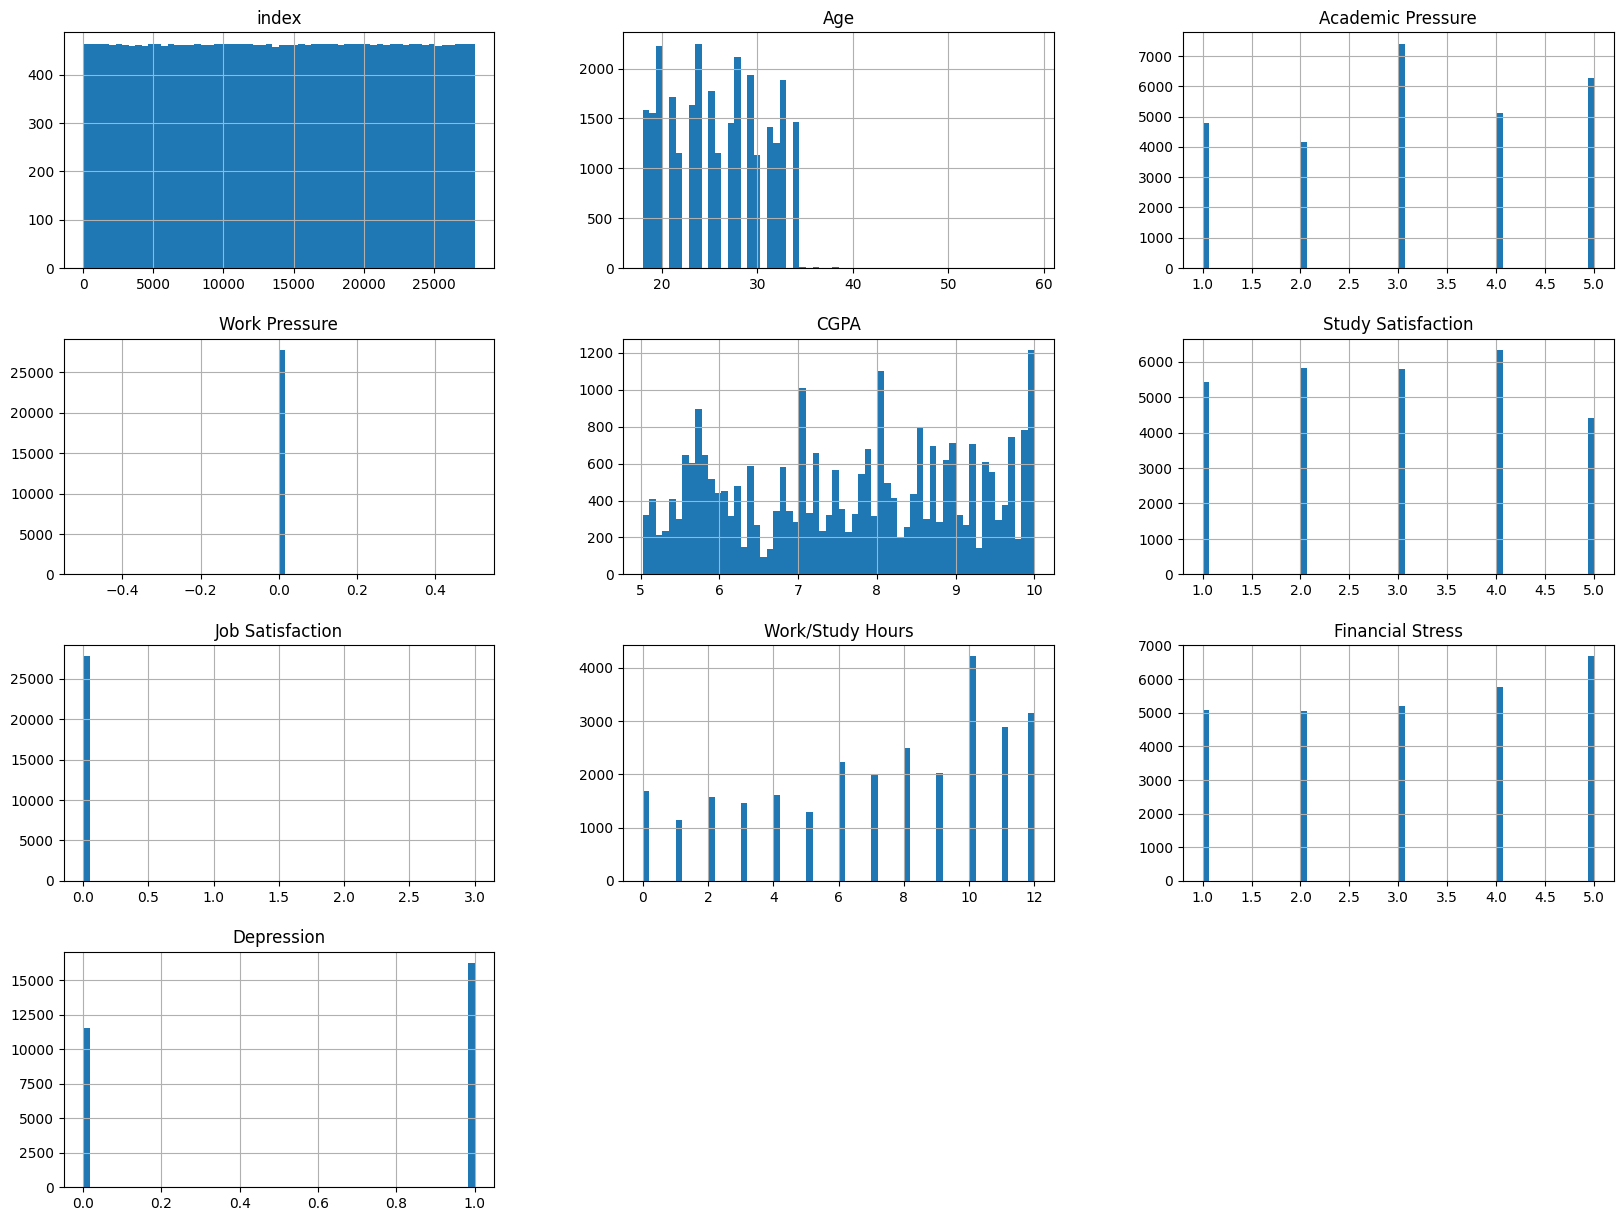

In [ ]:
# Se va a graficar los histogramas para observar el comportamiento de las variables numéricas
datoslimpios.hist(bins=60, figsize=(20,15))
plt.show()

## Acondicionamiento de datos

index                                    0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
npi                                      0
dtype: int64
npi
10    4217
12    3154
11    2883
8     2501
6     2240
9     2020
7     1992
0     1690
4     1604
2     1573
3     1459
5     1286
1     1143
Name: count, dtype: int

<Axes: >

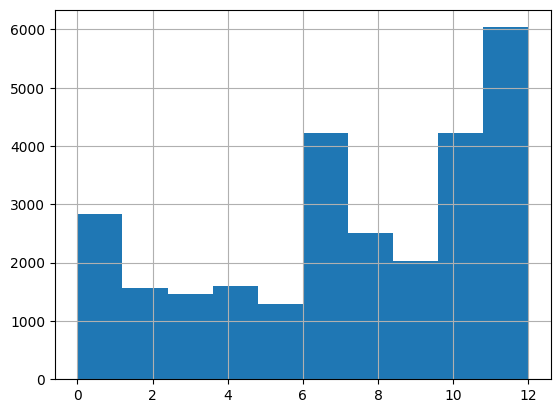

In [ ]:
datoslimpios["npi"] = pd.cut(datoslimpios["Work/Study Hours"],bins=[-1.,0.,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,11.,np.inf],labels=[0,1,2,3,4,5,6,7,8,9,10,11,12])
print(datoslimpios.isnull().sum())
print(datoslimpios["npi"].value_counts())
datoslimpios["npi"].hist()

In [ ]:
# Ahora bien a partir del de los histogramas se observan valores únicos repetidos a lo largo de todas las entradas
# por lo que se deciden borrar puesto que no aportan información valiosa

# Se divide el conjunto de datos 80 entrenamiento \ 20 pruebas por la cantidad de elementos
#d_e, d_p = train_test_split(datoslimpios,test_size=0.2, random_state=42)

# print(datoslimpios["Study Satisfaction"].value_counts())
# print(datoslimpios.isnull().sum())




# particion estratificada
splitear = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)


for train_index, test_index in splitear.split(datoslimpios,datoslimpios["npi"]):
    strat_train_set = datoslimpios.loc[train_index]
    strat_test_set =  datoslimpios.loc[test_index]

In [ ]:
strat_test_set["npi"].value_counts() / len(strat_test_set)

,count
npi,
10,0.151810
12,0.113632
11,0.103908
8,0.090041
6,0.080677
9,0.072753
7,0.071673
0,0.060868
4,0.057807


In [ ]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("npi", axis=1, inplace=True)

In [ ]:
datoslimpios=strat_train_set.copy()

In [ ]:

datoslimpios.drop(['index','Profession',"Work Pressure","Job Satisfaction"],axis=1,inplace=True)

# Se remplazan las variables categóricas por variables numéricas ordenales
datoslimpios.loc[datoslimpios['Gender'] == 'Male', 'Gender'] = 0
datoslimpios.loc[datoslimpios['Gender'] == 'Female', 'Gender'] = 1

datoslimpios['Sleep Duration'] = datoslimpios['Sleep Duration'].apply(lambda x: 0 if x == 'Less than 5 hours'
                                                                      else 1 if x == '5-6 hours'
                                                                      else 2 if x == '7-8 hours'
                                                                      else 3 if x == 'More than 8 hours'
                                                                      else x)

datoslimpios['Dietary Habits'] = datoslimpios['Dietary Habits'].apply(lambda x: 2 if x == 'Healthy'
                                                                      else 0 if x == 'Unhealthy'
                                                                      else 1 if x == 'Moderate'
                                                                      else x)
# Se crea una nueva categoría de grado de educación para englobar el grado de estudio de los estudiantes

datoslimpios['New_Degree'] = datoslimpios['Degree'].apply(lambda x: 'Graduated' if bool(re.search(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|BA|B.Arch|B.Tech|BBA|LLB', x)) else
                                           'Post Graduated' if bool(re.search(r'MSc|MCA|M.Ed|M.Pharm|M.Com|ME|MA|M.Arch|M.Tech|MBA|LLM|PhD|MD|MBBS|MBA|MHM', x)) else
                                           'Higher Secondary' if x == 'Class 12' else None)
# Se realiza la conversión a variable numérica

datoslimpios['New_Degree'] = datoslimpios['New_Degree'].apply(lambda x: 1 if x == 'Graduated'
                                              else 2 if x == 'Post Graduated'
                                              else 0 if x == 'Higher Secondary'
                                              else x)
# Se borra la columna original del grado de estudio

datoslimpios.drop(['Degree'],axis=1,inplace=True)

datoslimpios['Have you ever had suicidal thoughts ?'] = datoslimpios['Have you ever had suicidal thoughts ?'].apply(lambda x: 1 if x == 'Yes'
                                                                                                                    else 0 if x == 'No'
                                                                                                                    else x)

datoslimpios['Family History of Mental Illness'] = datoslimpios['Family History of Mental Illness'].apply(lambda x: 1 if x == 'Yes'                                                                                                                    else 0 if x == 'No'                                                                                                                    else x)
datoslimpios.head(5)

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
27547,1,34.0,Hyderabad,3.0,5.27,5.0,0,2,0,1.0,1.0,1,0,1
27252,1,27.0,Patna,3.0,7.47,5.0,2,0,1,9.0,4.0,0,1,1
5230,1,33.0,Kanpur,1.0,9.63,2.0,2,0,0,11.0,2.0,1,0,2
23462,0,31.0,Varanasi,5.0,7.32,3.0,0,2,1,4.0,4.0,0,1,0
17330,0,27.0,Thane,3.0,7.87,4.0,0,2,0,9.0,1.0,0,0,1


In [ ]:
# Se guarda el conjunto de datos acondicionados en un nuevo archivo de tipo CSV
# datoslimpios.to_csv("SDDN.csv",index=False)
#datoslistos = datoslimpios.copy()
datostristes_data = datoslimpios.copy()
datostristes_data.drop(["City"],axis=1,inplace = True)

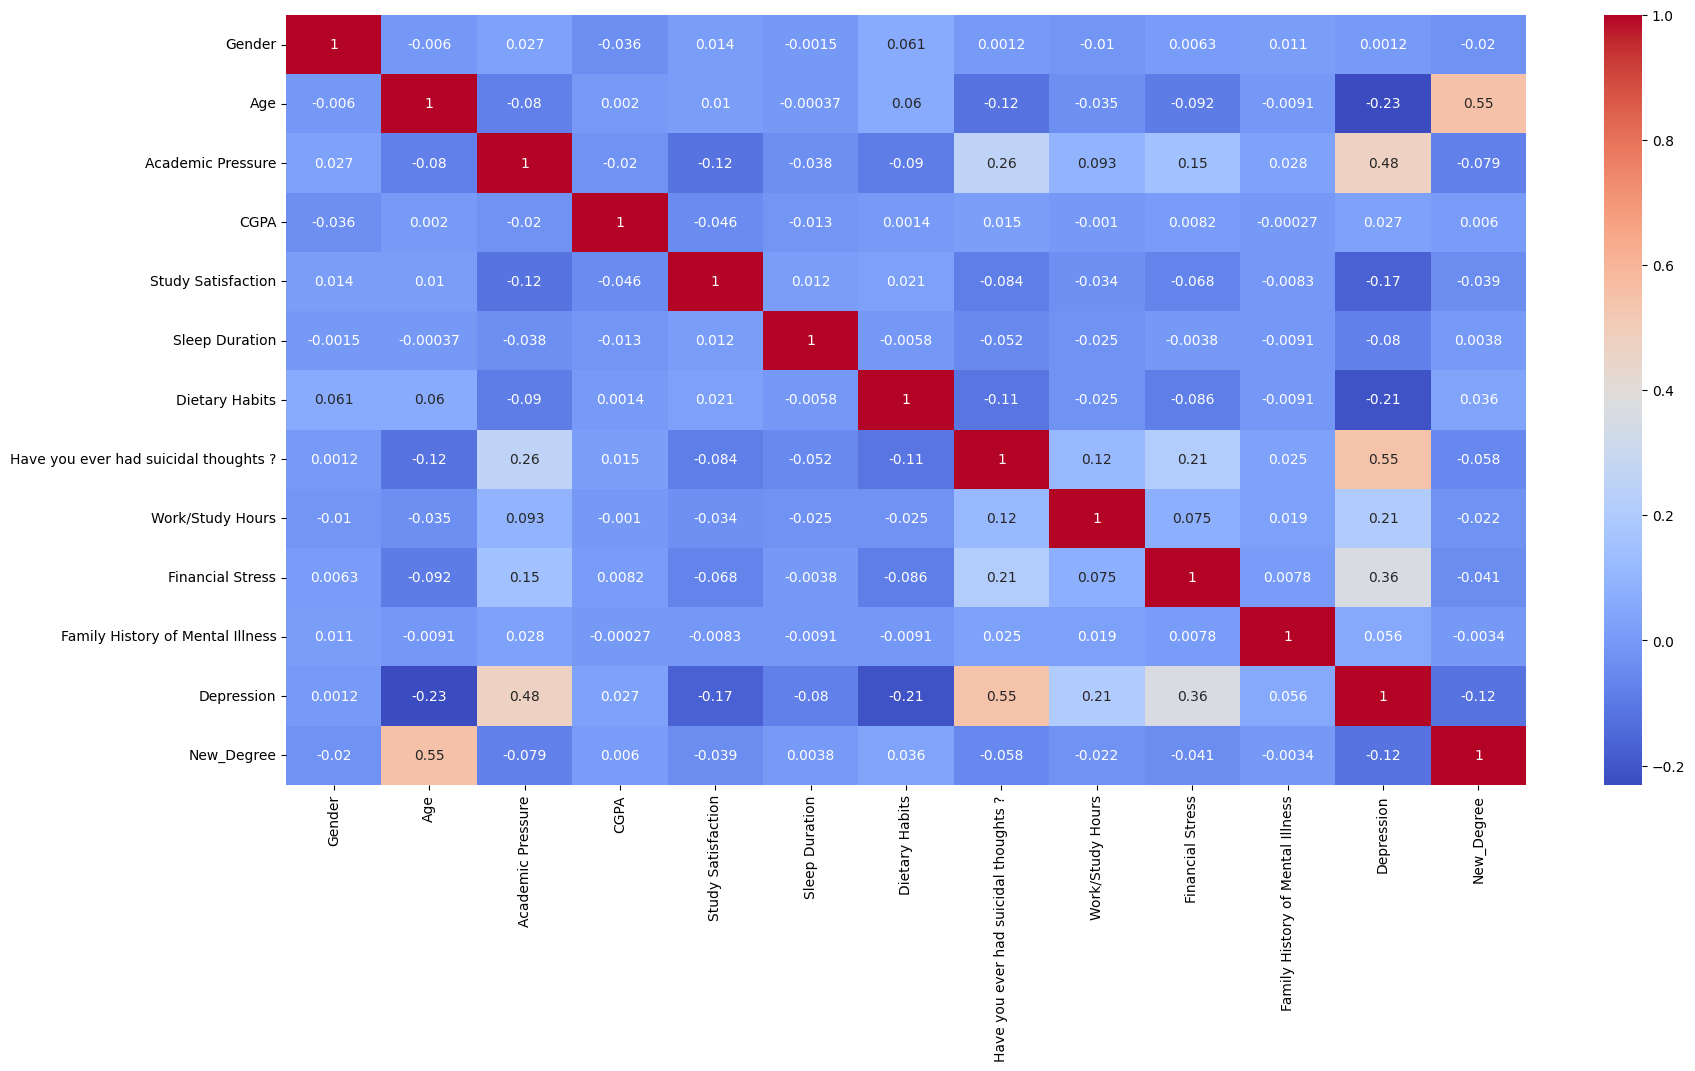

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(datostristes_data.corr(), annot=True, cmap='coolwarm')
plt.show()

array([[<Axes: xlabel='CGPA', ylabel='CGPA'>,
        <Axes: xlabel='Age', ylabel='CGPA'>,
        <Axes: xlabel='Work/Study Hours', ylabel='CGPA'>,
        <Axes: xlabel='Financial Stress', ylabel='CGPA'>,
        <Axes: xlabel='Sleep Duration', ylabel='CGPA'>],
       [<Axes: xlabel='CGPA', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Work/Study Hours', ylabel='Age'>,
        <Axes: xlabel='Financial Stress', ylabel='Age'>,
        <Axes: xlabel='Sleep Duration', ylabel='Age'>],
       [<Axes: xlabel='CGPA', ylabel='Work/Study Hours'>,
        <Axes: xlabel='Age', ylabel='Work/Study Hours'>,
        <Axes: xlabel='Work/Study Hours', ylabel='Work/Study Hours'>,
        <Axes: xlabel='Financial Stress', ylabel='Work/Study Hours'>,
        <Axes: xlabel='Sleep Duration', ylabel='Work/Study Hours'>],
       [<Axes: xlabel='CGPA', ylabel='Financial Stress'>,
        <Axes: xlabel='Age', ylabel='Financial Stress'>,
        <Axes: xlabel='Work/Study Hour

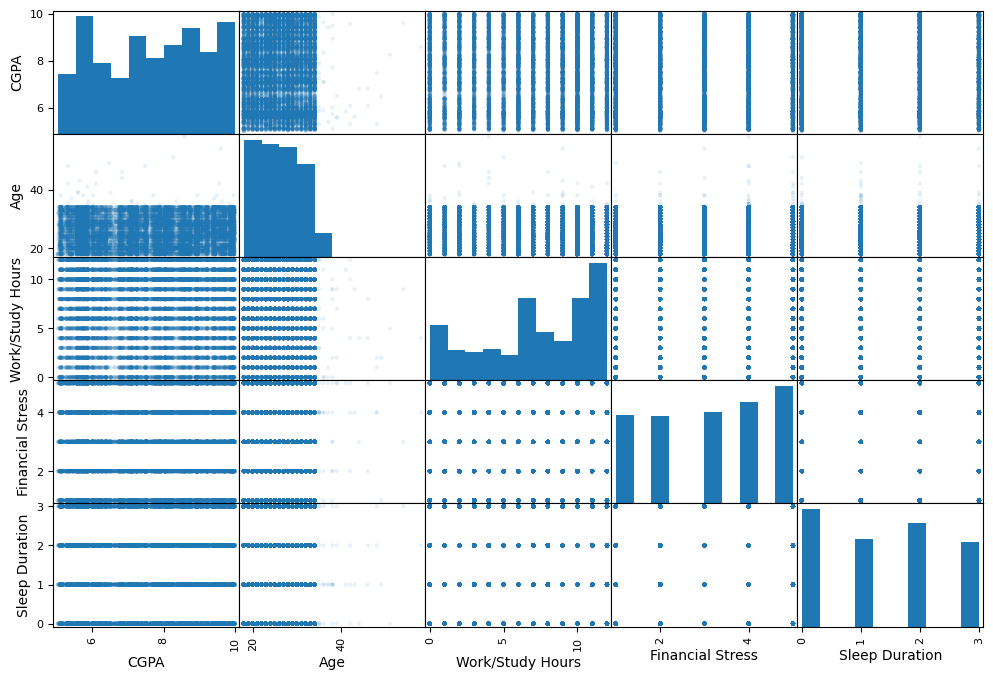

In [ ]:
# chorito regresión ""vpf""
# Se realizará con scatterplot la correlación
caracas = ["CGPA", "Age" ,"Work/Study Hours","Financial Stress","Sleep Duration"]
scatter_matrix(datostristes_data[caracas],figsize=(12,8),alpha=0.1)

In [ ]:
# se intentsran correlacionar creando características a partir de otras.
datostristes_data["dormir_edad"]=datostristes_data["Sleep Duration"]/datostristes_data["Age"]
datostristes_data["trabajo_satisfaccion"]=datostristes_data["Work/Study Hours"]/datostristes_data["Study Satisfaction"]
datostristes_data["dormir_satisfaccion"]=datostristes_data["Sleep Duration"]/datostristes_data["Study Satisfaction"]

datostristes_data["dormir_eda"]=datostristes_data["Age"]/datostristes_data["Sleep Duration"]
datostristes_data["trabajo_satisfaccio"]=datostristes_data["Study Satisfaction"]/datostristes_data["Work/Study Hours"]
datostristes_data["dormir_satisfaccio"]=datostristes_data["Study Satisfaction"]/datostristes_data["Sleep Duration"]
Corr_M=datostristes_data.corr()
Corr_M["CGPA"].sort_values(ascending=False)

,CGPA
CGPA,1.000000
trabajo_satisfaccion,0.028584
Depression,0.026629
dormir_eda,0.022015
Have you ever had suicidal thoughts ?,0.015245
dormir_satisfaccion,0.013222
Financial Stress,0.008234
New_Degree,0.006001
Age,0.002048
Dietary Habits,0.001394


In [ ]:
# Despues de pendejear un rato se procede a chambear
InTr = strat_train_set.drop("CGPA",axis=1)
InTrC = strat_train_set["CGPA"].copy()
InTr.head()

,index,Gender,Age,City,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27547,27685,Female,34.0,Hyderabad,Student,3.0,0.0,5.0,0.0,Less than 5 hours,Healthy,BCA,No,1.0,1.0,Yes,0
27252,27390,Female,27.0,Patna,Student,3.0,0.0,5.0,0.0,7-8 hours,Unhealthy,BHM,Yes,9.0,4.0,No,1
5230,5259,Female,33.0,Kanpur,Student,1.0,0.0,2.0,0.0,7-8 hours,Unhealthy,M.Tech,No,11.0,2.0,Yes,0
23462,23577,Male,31.0,Varanasi,Student,5.0,0.0,3.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,4.0,4.0,No,1
17330,17419,Male,27.0,Thane,Student,3.0,0.0,4.0,0.0,Less than 5 hours,Healthy,BHM,No,9.0,1.0,No,0


In [ ]:
InTr.drop(['index','Profession',"Work Pressure","Job Satisfaction"],axis=1,inplace=True)

# Se remplazan las variables categóricas por variables numéricas ordenales
InTr.loc[InTr['Gender'] == 'Male', 'Gender'] = 0
InTr.loc[InTr['Gender'] == 'Female', 'Gender'] = 1

InTr['Sleep Duration'] = InTr['Sleep Duration'].apply(lambda x: 0 if x == 'Less than 5 hours'
                                                                      else 1 if x == '5-6 hours'
                                                                      else 2 if x == '7-8 hours'
                                                                      else 3 if x == 'More than 8 hours'
                                                                      else x)

InTr['Dietary Habits'] = InTr['Dietary Habits'].apply(lambda x: 2 if x == 'Healthy'
                                                                      else 0 if x == 'Unhealthy'
                                                                      else 1 if x == 'Moderate'
                                                                      else x)
# Se crea una nueva categoría de grado de educación para englobar el grado de estudio de los estudiantes

InTr['New_Degree'] = InTr['Degree'].apply(lambda x: 'Graduated' if bool(re.search(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|BA|B.Arch|B.Tech|BBA|LLB', x)) else
                                           'Post Graduated' if bool(re.search(r'MSc|MCA|M.Ed|M.Pharm|M.Com|ME|MA|M.Arch|M.Tech|MBA|LLM|PhD|MD|MBBS|MBA|MHM', x)) else
                                           'Higher Secondary' if x == 'Class 12' else None)
# Se realiza la conversión a variable numérica

InTr['New_Degree'] = InTr['New_Degree'].apply(lambda x: 1 if x == 'Graduated'
                                              else 2 if x == 'Post Graduated'
                                              else 0 if x == 'Higher Secondary'
                                              else x)
# Se borra la columna original del grado de estudio

InTr.drop(['Degree'],axis=1,inplace=True)

InTr['Have you ever had suicidal thoughts ?'] = InTr['Have you ever had suicidal thoughts ?'].apply(lambda x: 1 if x == 'Yes'
                                                                                                                    else 0 if x == 'No'
                                                                                                                    else x)

InTr['Family History of Mental Illness'] = InTr['Family History of Mental Illness'].apply(lambda x: 1 if x == 'Yes'                                                                                                                    else 0 if x == 'No'                                                                                                                    else x)
InTr.head(5)

,Gender,Age,City,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
27547,1,34.0,Hyderabad,3.0,5.0,0,2,0,1.0,1.0,1,0,1
27252,1,27.0,Patna,3.0,5.0,2,0,1,9.0,4.0,0,1,1
5230,1,33.0,Kanpur,1.0,2.0,2,0,0,11.0,2.0,1,0,2
23462,0,31.0,Varanasi,5.0,3.0,0,2,1,4.0,4.0,0,1,0
17330,0,27.0,Thane,3.0,4.0,0,2,0,9.0,1.0,0,0,1


In [ ]:
from sklearn.tree import DecisionTreeRegressor
InTr.drop(["City"],axis=1,inplace = True)
tree_reg = DecisionTreeRegressor()
tree_reg.fit(InTr, InTrC)

DecisionTreeRegressor()

In [ ]:

from sklearn.metrics import mean_squared_error
housing_predictions = tree_reg.predict(InTr)
tree_mse = mean_squared_error(InTrC, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.09662305459223408


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, InTr, InTrC, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [2.08609313 2.10356656 2.06662819 2.09787906 2.11506135 2.05986117
 2.10705224 2.0950249  2.06901801 2.10243824]
Mean: 2.0902622831101136
Standard deviation: 0.018039819136399543


In [ ]:

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(InTr, InTrC)

some_data_prepared = InTr.iloc[:5]
some_labels = InTrC.iloc[:5]

print("Predictions:", lin_reg.predict(some_data_prepared))

print("Labels:", list(some_labels))


housing_predictions = lin_reg.predict(InTr)
lin_mse = mean_squared_error(InTrC, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

lin_scores = cross_val_score(lin_reg, InTr, InTrC,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Predictions: [7.50313628 7.53481513 7.63985471 7.72365136 7.61668452]
Labels: [5.27, 7.47, 9.63, 7.32, 7.87]
1.4624155238269863
Scores: [1.48734595 1.47725779 1.45856446 1.46504506 1.48611565 1.45148872
 1.45984645 1.45429309 1.43260358 1.46090231]
Mean: 1.463346306560771
Standard deviation: 0.01581014575119838


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(InTr, InTrC)

housing_predictions = forest_reg.predict(InTr)
forest_mse = mean_squared_error(InTrC, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

0.5700250843736618


In [ ]:
from sklearn.svm import SVR
svr_reg = SVR(kernel="rbf",C=1,epsilon=0.2)
svr_reg.fit(InTr, InTrC)

housing_predictions = svr_reg.predict(InTr)
svr_mse = mean_squared_error(InTrC, housing_predictions)
svr_rmse = np.sqrt(svr_mse)
print(svr_rmse)

1.4640645318817458


In [ ]:
scores = cross_val_score(forest_reg, InTr, InTrC, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [1.53662351 1.51467532 1.50450248 1.51797828 1.53791332 1.48432731
 1.50665043 1.49508069 1.48493382 1.50629864]
Mean: 1.5088983800201543
Standard deviation: 0.01768182425512004


In [ ]:
# Guardar modelos
from sklearn.externals import joblib.dump
joblib.dump(lin_reg, "lineal.pkl")
jonlib.dump(tree_reg, "tree.pkl")
jonlib.dump(forest_reg, "forest.pkl")

# and later...
#my_model_loaded = joblib.load("my_model.pkl")

SyntaxError: invalid syntax (<ipython-input-44-5aacb9480d83>, line 2)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [ {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(InTr, InTrC)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
print(grid_search.best_params_)
feature_importances = grid_search.best_estimator_.feature_importances_
#print(feature_importances)
attributes=list(datostristes_data)
Mejores = sorted(zip(feature_importances, attributes), reverse=True)
for x in Mejores:
    print(x)

{'max_features': 2, 'n_estimators': 30}
(np.float64(0.20827543020419204), 'Age')
(np.float64(0.20243039168605578), 'Have you ever had suicidal thoughts ?')
(np.float64(0.10079071229751584), 'Work/Study Hours')
(np.float64(0.0981033047328358), 'Academic Pressure')
(np.float64(0.09425560267672503), 'CGPA')
(np.float64(0.0814563391844081), 'Study Satisfaction')
(np.float64(0.06999110720667587), 'Sleep Duration')
(np.float64(0.047166632993266094), 'Depression')
(np.float64(0.03463232896861854), 'Financial Stress')
(np.float64(0.027046670811906603), 'Dietary Habits')
(np.float64(0.019537233004915108), 'Gender')
(np.float64(0.016314246232885257), 'Family History of Mental Illness')


In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("CGPA", axis=1)
y_test = strat_test_set["CGPA"].copy()


X_test.drop(['index','Profession',"Work Pressure","Job Satisfaction"],axis=1,inplace=True)

# Se remplazan las variables categóricas por variables numéricas ordenales
X_test.loc[X_test['Gender'] == 'Male', 'Gender'] = 0
X_test.loc[X_test['Gender'] == 'Female', 'Gender'] = 1

X_test['Sleep Duration'] = X_test['Sleep Duration'].apply(lambda x: 0 if x == 'Less than 5 hours'
                                                                      else 1 if x == '5-6 hours'
                                                                      else 2 if x == '7-8 hours'
                                                                      else 3 if x == 'More than 8 hours'
                                                                      else x)

X_test['Dietary Habits'] = X_test['Dietary Habits'].apply(lambda x: 2 if x == 'Healthy'
                                                                      else 0 if x == 'Unhealthy'
                                                                      else 1 if x == 'Moderate'
                                                                      else x)
# Se crea una nueva categoría de grado de educación para englobar el grado de estudio de los estudiantes

X_test['New_Degree'] = X_test['Degree'].apply(lambda x: 'Graduated' if bool(re.search(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|BA|B.Arch|B.Tech|BBA|LLB', x)) else
                                           'Post Graduated' if bool(re.search(r'MSc|MCA|M.Ed|M.Pharm|M.Com|ME|MA|M.Arch|M.Tech|MBA|LLM|PhD|MD|MBBS|MBA|MHM', x)) else
                                           'Higher Secondary' if x == 'Class 12' else None)
# Se realiza la conversión a variable numérica

X_test['New_Degree'] = X_test['New_Degree'].apply(lambda x: 1 if x == 'Graduated'
                                              else 2 if x == 'Post Graduated'
                                              else 0 if x == 'Higher Secondary'
                                              else x)
# Se borra la columna original del grado de estudio

X_test.drop(['Degree'],axis=1,inplace=True)

X_test['Have you ever had suicidal thoughts ?'] = X_test['Have you ever had suicidal thoughts ?'].apply(lambda x: 1 if x == 'Yes'
                                                                                                                    else 0 if x == 'No'
                                                                                                                    else x)

X_test['Family History of Mental Illness'] = X_test['Family History of Mental Illness'].apply(lambda x: 1 if x == 'Yes'                                                                                                                    else 0 if x == 'No'                                                                                                                    else x)
X_test.head()

   # => evaluates to 47,730.2

,Gender,Age,City,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
26414,1,29.0,Ludhiana,1.0,4.0,3,1,0,2.0,4.0,1,0,0
611,1,24.0,Chennai,1.0,3.0,1,2,0,10.0,1.0,0,0,1
20133,1,25.0,Kolkata,1.0,2.0,3,1,0,0.0,1.0,0,0,2
21462,0,26.0,Surat,4.0,4.0,1,2,1,4.0,3.0,1,0,2
15937,0,24.0,Nashik,3.0,5.0,1,2,1,3.0,5.0,0,1,1


In [ ]:

X_test_prepared = X_test.drop(["City"],axis=1)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)#desviación estándar de los valores residuales (errores de predicción)

1.506897318945566


In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([1.4873109 , 1.52623241])